In [1]:
# import modules

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
# Loading the dataset

df = pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [72]:
# Drop the unwanted column, i.e. Id here

df = df.drop(columns=['Id'])
df

KeyError: "['Id'] not found in axis"

In [5]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [8]:
# Preprocessing the dataset

# Check for null values

df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<AxesSubplot:>

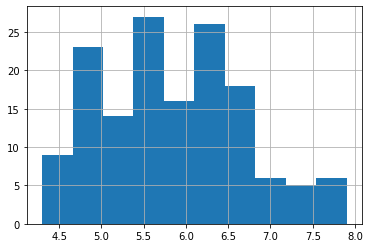

In [9]:
# Exploratory Data Analysis (EDA)

# Plot the histograms

df['SepalLengthCm'].hist()

<AxesSubplot:>

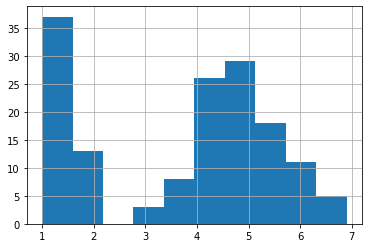

In [10]:
df['PetalLengthCm'].hist()

<AxesSubplot:>

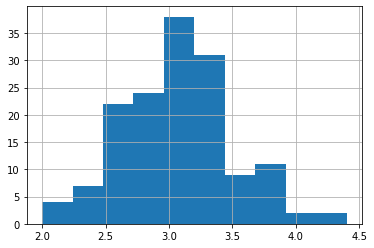

In [11]:
df['SepalWidthCm'].hist()

<AxesSubplot:>

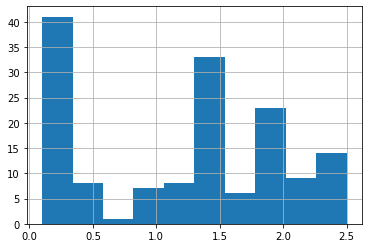

In [12]:
df['PetalWidthCm'].hist()

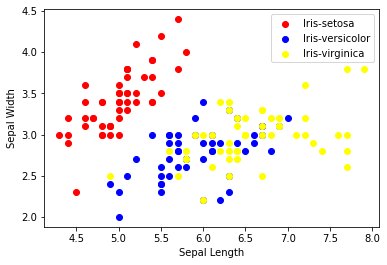

In [23]:
# Plot the scatterplots

species = ['Iris-setosa','Iris-versicolor','Iris-virginica']
c = ['red','blue','yellow']

for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'], c = c[i], label = species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

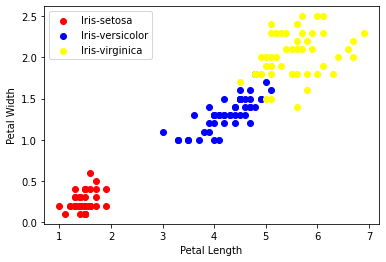

In [24]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'], c = c[i], label = species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

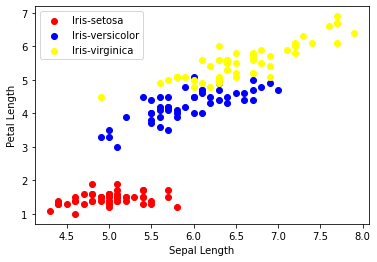

In [25]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'],x['PetalLengthCm'], c = c[i], label = species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

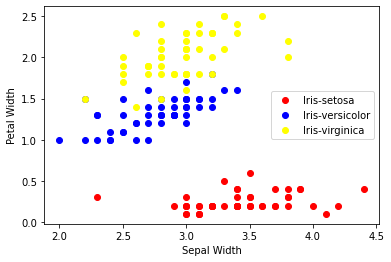

In [26]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalWidthCm'],x['PetalWidthCm'], c = c[i], label = species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

In [27]:
# Correlation Matrix

df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

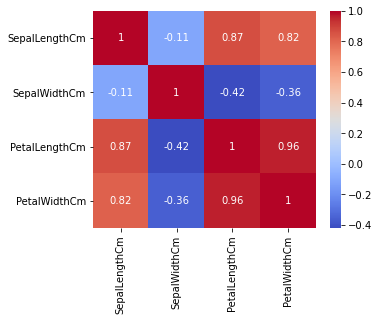

In [28]:
corr = df.corr()
fig,ax = plt.subplots(figsize = (5,4))
sns.heatmap(corr, annot = True, ax = ax, cmap = 'coolwarm')

In [29]:
# Label Encoder

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [61]:
# Model Training

from sklearn.model_selection import train_test_split
X = df.drop(columns=['Species'])
y = df['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [62]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [63]:
# Print metric to evaluate performance

print("Accuracy:", model.score(X_test, y_test)*100)

Accuracy: 95.55555555555556


In [64]:
# Prediction of output by the chosen model

y_pred = model.predict(X_test)
print(y_pred)

[2 2 0 2 1 0 0 2 1 2 0 1 0 0 1 2 2 2 0 0 0 0 1 2 1 1 0 1 1 2 1 2 0 2 1 2 0
 2 0 0 1 2 0 0 0]


In [65]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[18,  0,  0],
       [ 0, 12,  2],
       [ 0,  0, 13]], dtype=int64)

In [66]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9555555555555556


In [67]:
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
128,6.4,2.8,5.6,2.1
127,6.1,3.0,4.9,1.8
14,5.8,4.0,1.2,0.2
99,5.7,2.8,4.1,1.3
35,5.0,3.2,1.2,0.2


In [68]:
y_train.head()

128    2
127    2
14     0
99     1
35     0
Name: Species, dtype: int32

In [69]:
X_test.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
111,6.4,2.7,5.3,1.9
70,5.9,3.2,4.8,1.8
43,5.0,3.5,1.6,0.6
115,6.4,3.2,5.3,2.3
60,5.0,2.0,3.5,1.0


In [70]:
y_test.head()

111    2
70     1
43     0
115    2
60     1
Name: Species, dtype: int32

In [75]:
test_pred = X_test.copy()
test_pred['correct_output'] = y_test
test_pred['predicted_output'] = y_pred
test_pred['predicted_output_label'] = test_pred['predicted_output'].map({0:'setosa',1:'versicolor',2:'virginica'})
test_pred.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,correct_output,predicted_output,predicted_output_label
111,6.4,2.7,5.3,1.9,2,2,virginica
70,5.9,3.2,4.8,1.8,1,2,virginica
43,5.0,3.5,1.6,0.6,0,0,setosa
115,6.4,3.2,5.3,2.3,2,2,virginica
60,5.0,2.0,3.5,1.0,1,1,versicolor
